<a href="https://colab.research.google.com/github/Tasyasyaaaaa/PembelajaranMesin/blob/main/REGRESI_LINEAR_SEDERHANA_TASYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **REGRESI LINEAR SEDERHANA**
> **MACHINE LEARNING**

      Nama : Tasya
      NIM  : H081221043


In [11]:
import pandas as pd #untuk dataframe
import pylab as pl #untuk plotting
%matplotlib inline

In [12]:
# Import pandas library
import pandas as pd

# Read the Excel file
df = pd.read_excel("/content/Dataset UTS kelas A.xlsx")
df.head()

,Unnamed: 0,year,selling_price,km_driven
0,NaN,2007,60000,70000
1,NaN,2007,135000,50000
2,NaN,2012,600000,100000
3,NaN,2017,250000,46000
4,NaN,2014,450000,141000


In [48]:
#mengambil kolom yang akan dianalisis, dan membuang sisanya

cdf = df[['km_driven','selling_price']]
cdf.head(500)

,km_driven,selling_price
0,70000,60000
1,50000,135000
2,100000,600000
3,46000,250000
4,141000,450000
...,...,...
95,53000,350000
96,49000,2800000
97,15000,210000
98,50000,450000


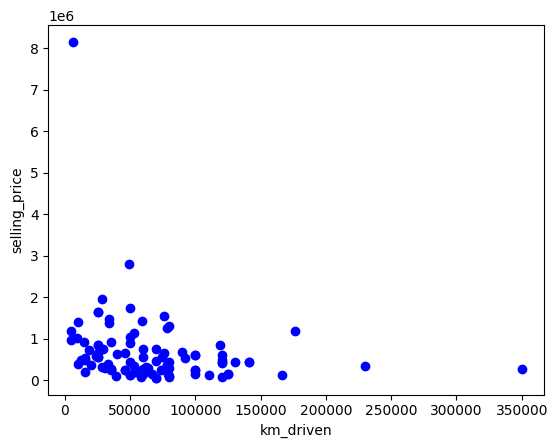

In [42]:
import matplotlib.pyplot as plt

plt.scatter(cdf.km_driven, cdf.selling_price,  color='blue')
plt.xlabel("km_driven")
plt.ylabel("selling_price")
plt.show()

In [43]:
import numpy as np

# Membagi data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

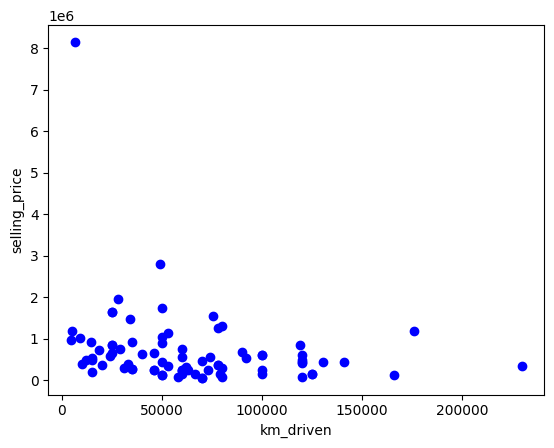

In [44]:
plt.scatter(train.km_driven, train.selling_price,  color='blue')
plt.xlabel("km_driven")
plt.ylabel("selling_price")
plt.show()

In [45]:
#Membuat model regresi
regr = LinearRegression()
train_x = np.asanyarray(train[['km_driven']])
train_y = np.asanyarray(train[['selling_price']])
regr.fit (train_x, train_y)

# Koefisien model
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[-5.67454682]]
Intercept:  [1064038.13575913]


Text(0, 0.5, 'selling_price')

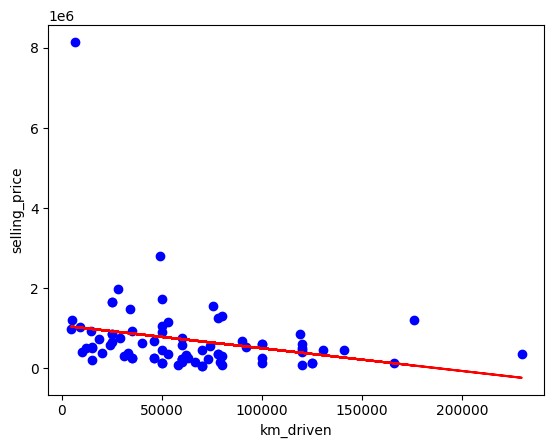

In [46]:
#Plot hasil regresi

plt.scatter(train.km_driven, train.selling_price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("km_driven")
plt.ylabel("selling_price")

In [47]:
#Menghitung error

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['km_driven']])
test_y = np.asanyarray(test[['selling_price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


Mean absolute error: 443212.51
Residual sum of squares (MSE): 266475394085.32
R2-score: -0.59


karena data memiliki nilai MSE yang sangat tinggi artinya kesalahan dari prediksi ini sangat besar, jadi lakukan transformasi untuk menormalisasikan pada data agar meminimalisir kesalahan dari prediksi yang ada.

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Membaca dataset dari file Excel
df = pd.read_excel("/content/Dataset UTS kelas A.xlsx")

# Memeriksa beberapa baris pertama dari dataset untuk memastikan data telah dibaca dengan benar
print(df.head())

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Pilih kolom yang ingin dinormalisasi, misalnya 'km_driven' dan 'selling_price'
columns_to_normalize = ['km_driven', 'selling_price']
scaled_data = scaler.fit_transform(df[columns_to_normalize])

# Membuat DataFrame baru dengan data yang telah dinormalisasi
df_normalized = pd.DataFrame(scaled_data, columns=columns_to_normalize)

# Menambahkan kolom lain yang tidak dinormalisasi (jika ada) kembali ke DataFrame
for col in df.columns:
    if col not in columns_to_normalize:
        df_normalized[col] = df[col]

# Menampilkan DataFrame yang telah dinormalisasi
print(df_normalized.head())


   Unnamed: 0  year  selling_price  km_driven
0         NaN  2007          60000      70000
1         NaN  2007         135000      50000
2         NaN  2012         600000     100000
3         NaN  2017         250000      46000
4         NaN  2014         450000     141000
   km_driven  selling_price  Unnamed: 0  year
0   0.189580       0.000000         NaN  2007
1   0.131693       0.009271         NaN  2007
2   0.276411       0.066749         NaN  2012
3   0.120116       0.023486         NaN  2017
4   0.395080       0.048208         NaN  2014


In [7]:
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi fitur (X) dan target (y)
X = df_normalized[['km_driven']]
y = df_normalized['selling_price']

# Pisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model dengan data pelatihan
model.fit(X_train, y_train)


LinearRegression()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi harga jual menggunakan data pengujian
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 0.046153750855831385
Mean Squared Error (MSE): 0.0031222467211025396
R-squared (R2): 0.12239938167772335


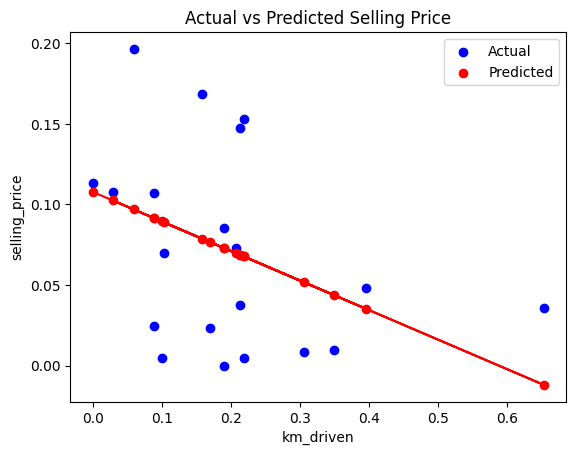

In [10]:
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('Actual vs Predicted Selling Price')
plt.legend()
plt.show()
